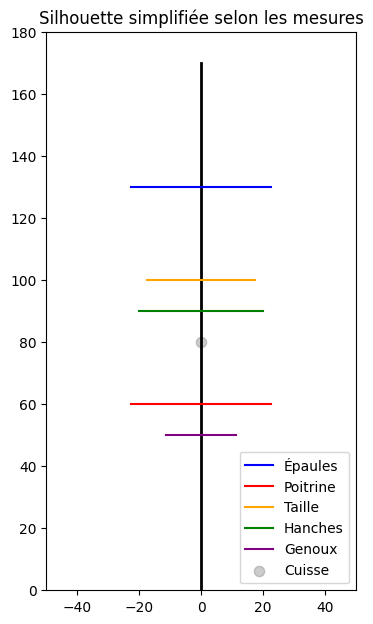

In [7]:
import matplotlib.pyplot as plt

# Exemple de mesures (remplace-les par les tiennes)
mesures = {
    'taille': 170,
    'tour_de_poitrine': 90,
    'hauteur_de_poitrine': 60,
    'hauteur_d_entrejambe': 80,
    'largeur_des_hanches': 40,
    'hauteur_des_hanches': 90,
    'hauteur_des_genoux': 50,
    'largeur_d_epaule': 45,
    'hauteur_des_epaules': 130,
    'tour_de_cuisse': 55,
    'tour_de_taille': 70,
    'hauteur_de_la_taille': 100
}

# Création d'une figure
fig, ax = plt.subplots(figsize=(4, 8))

# Dessin simplifié (vue de face)
# Tronc
ax.plot([0, 0], [0, mesures['taille']], color='black', linewidth=2)

# Épaules
epaule_g = -mesures['largeur_d_epaule']/2
epaule_d = mesures['largeur_d_epaule']/2
ax.plot([epaule_g, epaule_d], [mesures['hauteur_des_epaules']]*2, color='blue', label='Épaules')

# Poitrine
poitrine_g = -mesures['tour_de_poitrine']/4
poitrine_d = mesures['tour_de_poitrine']/4
ax.plot([poitrine_g, poitrine_d], [mesures['hauteur_de_poitrine']]*2, color='red', label='Poitrine')

# Taille
taille_g = -mesures['tour_de_taille']/4
taille_d = mesures['tour_de_taille']/4
ax.plot([taille_g, taille_d], [mesures['hauteur_de_la_taille']]*2, color='orange', label='Taille')

# Hanches
hanche_g = -mesures['largeur_des_hanches']/2
hanche_d = mesures['largeur_des_hanches']/2
ax.plot([hanche_g, hanche_d], [mesures['hauteur_des_hanches']]*2, color='green', label='Hanches')

# Genoux
ax.plot([epaule_g/2, epaule_d/2], [mesures['hauteur_des_genoux']]*2, color='purple', label='Genoux')

# Cuisses (représentées sous forme de points pour indiquer le tour)
ax.scatter(0, mesures['hauteur_d_entrejambe'], s=mesures['tour_de_cuisse'], color='gray', alpha=0.4, label='Cuisse')

# Configuration du graphique
ax.set_xlim(-50, 50)
ax.set_ylim(0, mesures['taille'] + 10)
ax.set_aspect('equal')
ax.set_title("Silhouette simplifiée selon les mesures")
# ax.invert_yaxis()
ax.legend(loc='lower right')

plt.show()

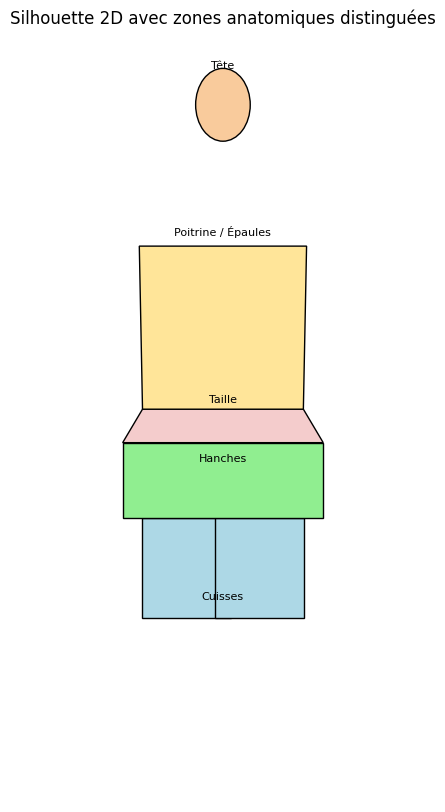

In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

# --- Mesures (en cm) ---
mesures = {
    "taille":	181.5084,
     "tour_de_poitrine" :	134.1120,
"hauteur_de_poitrine"	:133.1976,
"hauteur_d_entrejambe":78.1050,
"largeur_des_hanches":55.0926,
"hauteur_des_hanches"	:98.7044,
"hauteur_des_genoux"	:50.5968,
"largeur_d_epaule"	:45.9486,
"hauteur_des_epaules"	:152.6921,
"tour_de_cuisse"	:76.9112,
"tour_de_taille"	:138.8110,
"hauteur_de_la_taille": 107.8992,
}

# --- Fonction de conversion ---
def tour_to_largeur(tour):
    return tour / math.pi

# --- Calculs de largeurs apparentes ---
largeur_poitrine = tour_to_largeur(mesures["tour_de_poitrine"])
largeur_taille = tour_to_largeur(mesures["tour_de_taille"])
largeur_cuisse = tour_to_largeur(mesures["tour_de_cuisse"])
largeur_epaule = mesures["largeur_d_epaule"]
largeur_hanche = mesures["largeur_des_hanches"]

# --- Création de la figure ---
fig, ax = plt.subplots(figsize=(4, 10))
ax.set_xlim(-30, 30)
ax.set_ylim(0, mesures["taille"] + 30)
ax.set_aspect('equal')
ax.axis('off')

# --- Couleurs pour chaque zone ---
couleurs = {
    "cuisses": "#add8e6",       # bleu clair
    "hanches": "#90ee90",       # vert clair
    "taille": "#f4cccc",        # rose clair
    "poitrine": "#ffe599",      # jaune clair
    "epaules": "#c9daf8",       # bleu pastel
    "tete": "#f9cb9c"           # chair clair
}

# --- Dessin par zone ---
# Cuisses (gauche et droite)
ecart_cuisses = 10
for signe in [-1, 1]:
    ax.add_patch(patches.Rectangle(
        (signe * ecart_cuisses - largeur_cuisse/2, mesures["hauteur_des_genoux"]),
        largeur_cuisse,
        mesures["hauteur_d_entrejambe"] - mesures["hauteur_des_genoux"],
        facecolor=couleurs["cuisses"], edgecolor='black'
    ))
ax.text(0, mesures["hauteur_des_genoux"] + 5, "Cuisses", ha='center', fontsize=8)

# Hanches
ax.add_patch(patches.Rectangle(
    (-largeur_hanche/2, mesures["hauteur_d_entrejambe"]),
    largeur_hanche,
    mesures["hauteur_des_hanches"] - mesures["hauteur_d_entrejambe"],
    facecolor=couleurs["hanches"], edgecolor='black'
))
ax.text(0, mesures["hauteur_des_hanches"] - 5, "Hanches", ha='center', fontsize=8)

# Taille (trapèze)
ax.add_patch(patches.Polygon([
    (-largeur_hanche/2, mesures["hauteur_des_hanches"]),
    (-largeur_taille/2, mesures["hauteur_de_la_taille"]),
    (largeur_taille/2, mesures["hauteur_de_la_taille"]),
    (largeur_hanche/2, mesures["hauteur_des_hanches"])
], closed=True, facecolor=couleurs["taille"], edgecolor='black'))
ax.text(0, mesures["hauteur_de_la_taille"] + 2, "Taille", ha='center', fontsize=8)

# Poitrine reliée aux épaules (trapèze élargi jusqu'à la largeur des épaules)
ax.add_patch(patches.Polygon([
    (-largeur_taille/2, mesures["hauteur_de_la_taille"]),
    (-largeur_epaule/2, mesures["hauteur_des_epaules"]),
    (largeur_epaule/2, mesures["hauteur_des_epaules"]),
    (largeur_taille/2, mesures["hauteur_de_la_taille"])
], closed=True, facecolor=couleurs["poitrine"], edgecolor='black'))
ax.text(0, mesures["hauteur_des_epaules"] + 3, "Poitrine / Épaules", ha='center', fontsize=8)



# Tête (ellipse)
ax.add_patch(patches.Ellipse(
    (0, mesures["taille"] + 10),
    width=15, height=20,
    facecolor=couleurs["tete"], edgecolor='black'
))
ax.text(0, mesures["taille"] + 20, "Tête", ha='center', fontsize=8)

# --- Affichage final ---
plt.title("Silhouette 2D avec zones anatomiques distinguées", fontsize=12)
plt.show()
